In [2]:
import pandas as pd;
import numpy as np;
import os;
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_models import LinearRegression,BayesianRidge
import tensorflow as tf

In [3]:

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18440004607206741562
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3053479225095774157
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10838789857517363426
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9709274074168593313
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
Found GPU at: /device:GPU:0


In [4]:
sales = pd.read_csv("https://raw.githubusercontent.com/tbenthomas/olist_pricing/main/prepared.csv")

In [5]:
sales.columns

Index(['Unnamed: 0', 'Time_to_customer', 'price', 'quantity', 'Year',
       'Week_Num', 'customer_zip_code_prefix', 'customer_city_x',
       'customer_state_x', 'customer_city_y', 'customer_state_y', 'category',
       'day', 'month'],
      dtype='object')

In [6]:
sales = pd.concat([sales,pd.get_dummies(sales['category'])],axis=1)
sales = pd.concat([sales,pd.get_dummies(sales['day'])],axis=1)
sales =sales.drop(['category','day'],axis=1)
#sales = pd.concat([sales,pd.get_dummies(sales['customer_state_x'])],axis=1)
sales =sales.drop(['customer_state_x','customer_zip_code_prefix','customer_city_x','customer_city_y','customer_state_y'],axis=1)
sales =sales.dropna()
sales = sales.drop(['Unnamed: 0'],axis=1)

In [7]:
sales

,Time_to_customer,price,quantity,Year,Week_Num,month,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,cool_stuff,costruction_tools_garden,diapers_and_hygiene,drinks,electronics,fashion_bags_accessories,fashion_shoes,fixed_telephony,flowers,food,food_drink,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_confort,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,luggage_accessories,market_place,musical_instruments,office_furniture,perfumery,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,telephony,toys,watches_gifts,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,13.0,118.7,1,2018,30,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13.0,118.7,1,2018,30,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5.0,116.9,1,2018,32,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5.0,116.9,1,2018,32,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5.0,116.9,1,2018,32,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
350264,6.0,187.0,1,2018,23,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
350265,6.0,187.0,1,2018,23,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
350266,8.0,188.0,1,2018,19,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
Y = sales['quantity']
X = sales.drop(['quantity'],axis=1)
filtered = ['Wednesday','watches_gifts','furniture_decor','Thursday','Tuesday','garden_tools','Friday','Time_to_customer'
          ,'Week_Num','price']
X = X[filtered]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 85)
X

,Wednesday,watches_gifts,furniture_decor,Thursday,Tuesday,garden_tools,Friday,Time_to_customer,Week_Num,price
0,0,0,0,0,1,0,0,13.0,30,118.7
1,0,0,0,0,1,0,0,13.0,30,118.7
2,0,0,0,1,0,0,0,5.0,32,116.9
3,0,0,0,1,0,0,0,5.0,32,116.9
4,0,0,0,1,0,0,0,5.0,32,116.9
...,...,...,...,...,...,...,...,...,...,...
350263,0,0,0,0,0,0,0,6.0,23,187.0
350264,0,0,0,0,0,0,0,6.0,23,187.0
350265,0,0,0,0,0,0,0,6.0,23,187.0
350266,0,0,0,1,0,0,0,8.0,19,188.0


In [21]:
from sklearn import metrics

def summary_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Decision Tree

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Input, Dropout, AvgPool1D, Reshape, Concatenate
from tensorflow.keras.models import Sequential, Model

In [13]:
print(tf.__version__)

2.3.0


In [14]:
X_train_vals = X_Train.values.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_test_vals = X_Test.values.reshape((X_Test.shape[0], 1, X_Test.shape[1]))


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(500,return_sequences=False, input_shape=(X_train_vals.shape[1], X_train_vals.shape[2])))
model.add(layers.Dense(500))
model.add(layers.Dense(.99))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [15]:
inputs = Input(shape=(X_train_vals.shape[1], X_train_vals.shape[2]))
# top pipeline
top_lstm = LSTM(500)(inputs)
top_dense = Dense(500, activation='relu')(top_lstm)
top_dropout = Dropout(.2)(top_dense)
# bottom pipeline
bottom_dense = Dense(500)(inputs)
bottom_conv1 = Conv1D(
    500, 
    kernel_size=1,
    input_shape=(X_train_vals.shape[1], X_train_vals.shape[2])
)(bottom_dense)
bottom_conv2 = Conv1D(
    1000,
    kernel_size=50,
    padding='same',
    activation='relu'
)(bottom_conv1)
bottom_conv3 = Conv1D(
    1,
    kernel_size=10,
    padding='same',
    activation='relu'
)(bottom_conv2)
bottom_pooling = AvgPool1D(
    pool_size=60, 
    padding='same'
)(bottom_conv3)
bottom_reshape = Reshape(
    target_shape=[1]
)(bottom_conv3)
# concat output from both pipelines
final_concat = Concatenate()([top_dropout, bottom_reshape])
final_dense = Dense(1)(final_concat)
# compile and return
lstm_cnn_model = Model(inputs=inputs, outputs=final_dense)
lstm_cnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

In [16]:
lstm_cnn_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 10)]      0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1, 500)       5500        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 500)       250500      dense_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 500)          1022000     input_1[0][0]                    
_______________________________________________________________________________________

In [48]:
with tf.device('/device:GPU:0'):
  complex_history = lstm_cnn_model.fit(
      X_train_vals, 
      Y_Train.values, 
      epochs=20, 
      batch_size=200,
      validation_data=(X_test_vals, Y_Test.values),
      verbose=2,
      shuffle=False
  )

Epoch 1/20
1211/1211 - 114s - loss: 1.4019 - mape: 44.4653 - val_loss: 1.3211 - val_mape: 43.1865
Epoch 2/20
1211/1211 - 114s - loss: 1.3814 - mape: 44.3045 - val_loss: 1.3084 - val_mape: 44.0172
Epoch 3/20
1211/1211 - 114s - loss: 1.3779 - mape: 44.1266 - val_loss: 1.2802 - val_mape: 42.6748
Epoch 4/20
1211/1211 - 114s - loss: 1.3560 - mape: 43.7728 - val_loss: 1.2636 - val_mape: 43.2074
Epoch 5/20
1211/1211 - 114s - loss: 1.3379 - mape: 43.5009 - val_loss: 1.2687 - val_mape: 42.3454
Epoch 6/20
1211/1211 - 114s - loss: 1.3253 - mape: 43.3190 - val_loss: 1.2975 - val_mape: 44.7778
Epoch 7/20
1211/1211 - 114s - loss: 1.3194 - mape: 43.0795 - val_loss: 1.2465 - val_mape: 43.0948
Epoch 8/20
1211/1211 - 114s - loss: 1.3021 - mape: 42.8931 - val_loss: 1.2385 - val_mape: 41.8235
Epoch 9/20
1211/1211 - 113s - loss: 1.2852 - mape: 42.6256 - val_loss: 1.2317 - val_mape: 42.6011
Epoch 10/20
1211/1211 - 113s - loss: 1.2674 - mape: 42.3204 - val_loss: 1.2181 - val_mape: 41.9957
Epoch 11/20
1211/12

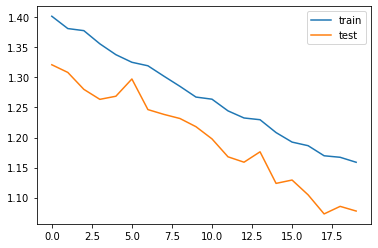

explained_variance:  0.7737
r2:  0.7736
MAE:  0.6424
MSE:  1.0777
RMSE:  1.0381


In [49]:
def plot_history(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

plot_history(complex_history)
summary_results(Y_Test.values,lstm_cnn_model.predict(X_test_vals))


In [51]:
X_all =X.values.reshape((X.shape[0], 1, X.shape[1]))
summary_results(Y,lstm_cnn_model.predict(X_all))


explained_variance:  0.7784
r2:  0.7783
MAE:  0.6349
MSE:  1.0549
RMSE:  1.0271


In [52]:
lstm_cnn_model.save("/content/gdrive/My Drive/lstm_cnn_model")

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/lstm_cnn_model/assets


In [60]:
#Retrain with different split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 98)

X_train_vals = X_Train.values.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_test_vals = X_Test.values.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

with tf.device('/device:GPU:0'):
  complex_history = lstm_cnn_model.fit(
      X_train_vals, 
      Y_Train.values, 
      epochs=10, 
      batch_size=200,
      validation_data=(X_test_vals, Y_Test.values),
      verbose=2,
      shuffle=False
  )

Epoch 1/10
1211/1211 - 113s - loss: 0.9934 - mape: 36.8187 - val_loss: 0.9671 - val_mape: 33.5414
Epoch 2/10
1211/1211 - 113s - loss: 1.0008 - mape: 36.8192 - val_loss: 0.9476 - val_mape: 33.7497
Epoch 3/10
1211/1211 - 113s - loss: 0.9863 - mape: 36.4908 - val_loss: 0.9295 - val_mape: 33.3842
Epoch 4/10
1211/1211 - 113s - loss: 0.9769 - mape: 36.4289 - val_loss: 0.9300 - val_mape: 33.3871
Epoch 5/10
1211/1211 - 113s - loss: 0.9714 - mape: 36.3092 - val_loss: 0.9463 - val_mape: 33.6855
Epoch 6/10
1211/1211 - 113s - loss: 0.9616 - mape: 36.0146 - val_loss: 0.9377 - val_mape: 33.2576
Epoch 7/10
1211/1211 - 113s - loss: 0.9615 - mape: 35.9685 - val_loss: 0.8931 - val_mape: 32.9554
Epoch 8/10
1211/1211 - 113s - loss: 0.9485 - mape: 35.6977 - val_loss: 0.8815 - val_mape: 32.4441
Epoch 9/10
1211/1211 - 113s - loss: 0.9419 - mape: 35.6302 - val_loss: 0.8736 - val_mape: 32.2215
Epoch 10/10
1211/1211 - 113s - loss: 0.9491 - mape: 35.6326 - val_loss: 0.8926 - val_mape: 32.1639


In [61]:
summary_results(Y_Test.values,lstm_cnn_model.predict(X_test_vals))

explained_variance:  0.815
r2:  0.8149
MAE:  0.5532
MSE:  0.8926
RMSE:  0.9448


In [62]:
lstm_cnn_model.save("/content/gdrive/My Drive/lstm_cnn_model")

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/lstm_cnn_model/assets
